In [1]:
import models
import model_setup
import torch
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime
from torchvision import transforms
import seaborn as sns

# Setup data

In [2]:
# Load new dataset
dataset = model_setup.load_data(max_files=30_000)

Processing Data: 100%|██████████| 30000/30000 [02:01<00:00, 247.19image/s]


Split the data into training, testing, and validation sets

In [3]:
loader = DataLoader(
    dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True
)
train_subset, test_subset, val_subset = random_split(loader.dataset, [0.7, 0.2, 0.1])
val_size = len(val_subset.indices)
del loader

In [4]:
train_transform = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.GaussianBlur(kernel_size=3),
        transforms.RandomGrayscale(p=0.1),
        transforms.RandomPosterize(bits=4, p=0.1),
        transforms.RandomSolarize(threshold=128, p=0.1),
        transforms.RandomEqualize(p=0.1),
        transforms.ToTensor(),
    ]
)

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input * 255) / 255
    # new_input.show()
    # break
    train_subset.dataset.data[idx] = (new_input, label)

100%|██████████| 21000/21000 [04:29<00:00, 77.91it/s]


In [5]:
train = DataLoader(
    train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True
)
test = DataLoader(
    test_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True
)
val = DataLoader(
    val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True
)

# Training

In [6]:
saved_models = []
t_info = {}

In [7]:
model = models.OccModel()
training_info = model.train_model(train, test, epochs=60, early_stopping_patience=10, learning_rate=10**-2)
torch.save(
    model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt"
)
# t_info.append(training_info)
t_info["LR = 10^-2"] = training_info
saved_models.append(model)


Epoch 1/60 (Training): 100%|██████████| 329/329 [02:14<00:00,  2.45it/s]


Loss: 3.099932, Mean Absolute Error: 0.13916917961645633, Time remaining: 2:26:20.141286


Epoch 2/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 2.372662, Mean Absolute Error: 0.11519436958305379, Time remaining: 2:18:24.139676


Epoch 3/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 2.149624, Mean Absolute Error: 0.11140226873945683, Time remaining: 2:14:14.145201


Epoch 4/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.949400, Mean Absolute Error: 0.09255852926760277, Time remaining: 2:10:58.806704


Epoch 5/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.885879, Mean Absolute Error: 0.08720344328816901, Time remaining: 2:08:04.085420


Epoch 6/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.859909, Mean Absolute Error: 0.08592285267374616, Time remaining: 2:05:21.603192


Epoch 7/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.808775, Mean Absolute Error: 0.09222407714325062, Time remaining: 2:02:48.698067


Epoch 8/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.792431, Mean Absolute Error: 0.09441055733948311, Time remaining: 2:00:16.270360


Epoch 9/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.755957, Mean Absolute Error: 0.08186522518542219, Time remaining: 1:57:49.008612


Epoch 10/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 1.685776, Mean Absolute Error: 0.08762062380605555, Time remaining: 1:55:28.254850


Epoch 11/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 1.615239, Mean Absolute Error: 0.07555226438698616, Time remaining: 1:53:07.791591


Epoch 12/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 1.546517, Mean Absolute Error: 0.07731325353713746, Time remaining: 1:50:47.530416


Epoch 13/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 1.485943, Mean Absolute Error: 0.15115670839998316, Time remaining: 1:48:27.721144


Epoch 14/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.516653, Mean Absolute Error: 0.0702129052951932, Time remaining: 1:46:06.695182


Epoch 15/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.435565, Mean Absolute Error: 0.0770132323687381, Time remaining: 1:43:46.118415


Epoch 16/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.371162, Mean Absolute Error: 0.06362784317040697, Time remaining: 1:41:25.896872


Epoch 17/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.315712, Mean Absolute Error: 0.06194759273227859, Time remaining: 1:39:05.942347


Epoch 18/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.281518, Mean Absolute Error: 0.06014173953457082, Time remaining: 1:36:46.056774


Epoch 19/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.250902, Mean Absolute Error: 0.06878936435393196, Time remaining: 1:34:27.182114


Epoch 20/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 1.244139, Mean Absolute Error: 0.059022737746226024, Time remaining: 1:32:08.049600


Epoch 21/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.217899, Mean Absolute Error: 0.06303829943483814, Time remaining: 1:29:49.035015


Epoch 22/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.208863, Mean Absolute Error: 0.06125571980993164, Time remaining: 1:27:29.707068


Epoch 23/60 (Training): 100%|██████████| 329/329 [02:07<00:00,  2.58it/s]


Loss: 1.195604, Mean Absolute Error: 0.06078489013808839, Time remaining: 1:25:17.660698


Epoch 24/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.181705, Mean Absolute Error: 0.058644658469773354, Time remaining: 1:22:58.241604


Epoch 25/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.168730, Mean Absolute Error: 0.05918271082671399, Time remaining: 1:20:38.661590


Epoch 26/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.170498, Mean Absolute Error: 0.060038429050845034, Time remaining: 1:18:19.536780


Epoch 27/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.166602, Mean Absolute Error: 0.057612599507766836, Time remaining: 1:16:00.498822


Epoch 28/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.152439, Mean Absolute Error: 0.053660682461997296, Time remaining: 1:13:41.654528


Epoch 29/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.129321, Mean Absolute Error: 0.058183945992842635, Time remaining: 1:11:22.777534


Epoch 30/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.127538, Mean Absolute Error: 0.07212372954459266, Time remaining: 1:09:04.053510


Epoch 31/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.119722, Mean Absolute Error: 0.05751503134106702, Time remaining: 1:06:45.447259


Epoch 32/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.116664, Mean Absolute Error: 0.06536214372658349, Time remaining: 1:04:26.896992


Epoch 33/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.108449, Mean Absolute Error: 0.06379253248822817, Time remaining: 1:02:08.213217


Epoch 34/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.117829, Mean Absolute Error: 0.06290670591307447, Time remaining: 0:59:49.706848


Epoch 35/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.098975, Mean Absolute Error: 0.06261767149764172, Time remaining: 0:57:31.044450


Epoch 36/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.099570, Mean Absolute Error: 0.05662921170129421, Time remaining: 0:55:12.637944


Epoch 37/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.67it/s]


Loss: 1.089611, Mean Absolute Error: 0.052630209423443104, Time remaining: 0:52:54.162518


Epoch 38/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.095171, Mean Absolute Error: 0.053550196454880086, Time remaining: 0:50:35.786358


Epoch 39/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.082852, Mean Absolute Error: 0.07117395463617558, Time remaining: 0:48:17.503308


Epoch 40/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.075885, Mean Absolute Error: 0.07750214240018358, Time remaining: 0:45:59.229480


Epoch 41/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.076400, Mean Absolute Error: 0.051971005196584034, Time remaining: 0:43:41.163259


Epoch 42/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.074486, Mean Absolute Error: 0.05423438230014228, Time remaining: 0:41:23.141400


Epoch 43/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.069656, Mean Absolute Error: 0.06363373548981358, Time remaining: 0:39:05.101907


Epoch 44/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.061911, Mean Absolute Error: 0.05464424943908098, Time remaining: 0:36:46.955888


Epoch 45/60 (Training): 100%|██████████| 329/329 [02:04<00:00,  2.64it/s]


Loss: 1.055019, Mean Absolute Error: 0.05399241506498545, Time remaining: 0:34:29.400945


Epoch 46/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.040106, Mean Absolute Error: 0.053583301901024706, Time remaining: 0:32:11.279994


Epoch 47/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.039245, Mean Absolute Error: 0.04790967825720919, Time remaining: 0:29:53.249549


Epoch 48/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.047288, Mean Absolute Error: 0.05328614908726292, Time remaining: 0:27:35.255112


Epoch 49/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.047408, Mean Absolute Error: 0.053100695536333196, Time remaining: 0:25:17.270953


Epoch 50/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.031390, Mean Absolute Error: 0.05349146251745047, Time remaining: 0:22:59.303380


Epoch 51/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 1.034509, Mean Absolute Error: 0.0540312991101057, Time remaining: 0:20:41.344665


Epoch 52/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.027520, Mean Absolute Error: 0.0555904556977305, Time remaining: 0:18:23.359216


Epoch 53/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.017631, Mean Absolute Error: 0.04968158161624315, Time remaining: 0:16:05.388991


Epoch 54/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.019604, Mean Absolute Error: 0.0488834655942752, Time remaining: 0:13:47.430210


Epoch 55/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.009774, Mean Absolute Error: 0.04823587650552075, Time remaining: 0:11:29.494160


Epoch 56/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.018055, Mean Absolute Error: 0.05334153773381989, Time remaining: 0:09:11.566668


Epoch 57/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.015947, Mean Absolute Error: 0.051537731345346637, Time remaining: 0:06:53.656980


Epoch 58/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.018621, Mean Absolute Error: 0.06079212580113969, Time remaining: 0:04:35.760540


Epoch 59/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.927827, Mean Absolute Error: 0.046587398592778974, Time remaining: 0:02:17.874837


Epoch 60/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.903565, Mean Absolute Error: 0.04358505231744431, Time remaining: 0:00:00


In [8]:
model = models.OccModel()
training_info = model.train_model(train, test, epochs=60, early_stopping_patience=10, learning_rate=10**-3)
torch.save(
    model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt"
)
# t_info.append(training_info)
t_info["LR = 10^-3"] = training_info
saved_models.append(model)


Epoch 1/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 2.093308, Mean Absolute Error: 0.09224271152089251, Time remaining: 2:15:23.576719


Epoch 2/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.535110, Mean Absolute Error: 0.06343607979014199, Time remaining: 2:12:51.217936


Epoch 3/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.297717, Mean Absolute Error: 0.06155196902282695, Time remaining: 2:10:29.499252


Epoch 4/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.131803, Mean Absolute Error: 0.09975443703142252, Time remaining: 2:08:12.090896


Epoch 5/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.054748, Mean Absolute Error: 0.0483963886830718, Time remaining: 2:05:53.551005


Epoch 6/60 (Training): 100%|██████████| 329/329 [02:05<00:00,  2.63it/s]


Loss: 1.029145, Mean Absolute Error: 0.0526674247961095, Time remaining: 2:03:56.827620


Epoch 7/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.964428, Mean Absolute Error: 0.046791232329733826, Time remaining: 2:01:37.298693


Epoch 8/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.927510, Mean Absolute Error: 0.04223168920725584, Time remaining: 1:59:17.466576


Epoch 9/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.896208, Mean Absolute Error: 0.041647022976440955, Time remaining: 1:56:58.467459


Epoch 10/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.834468, Mean Absolute Error: 0.040702350685333316, Time remaining: 1:54:40.009800


Epoch 11/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.793816, Mean Absolute Error: 0.05880422789127903, Time remaining: 1:52:20.653395


Epoch 12/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.785248, Mean Absolute Error: 0.04111886460413324, Time remaining: 1:50:03.245328


Epoch 13/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.771784, Mean Absolute Error: 0.040525469136364914, Time remaining: 1:47:43.794521


Epoch 14/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.782321, Mean Absolute Error: 0.03794490104105244, Time remaining: 1:45:25.967150


Epoch 15/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.728302, Mean Absolute Error: 0.038569706898341154, Time remaining: 1:43:08.791905


Epoch 16/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.683068, Mean Absolute Error: 0.0385106758194718, Time remaining: 1:40:50.333696


Epoch 17/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.642209, Mean Absolute Error: 0.042080387829783114, Time remaining: 1:38:32.141982


Epoch 18/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.725578, Mean Absolute Error: 0.051226228673724415, Time remaining: 1:36:14.442156


Epoch 19/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.631013, Mean Absolute Error: 0.03508716067695554, Time remaining: 1:33:56.713661


Epoch 20/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.599636, Mean Absolute Error: 0.03615942201081743, Time remaining: 1:31:39.118160


Epoch 21/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.592543, Mean Absolute Error: 0.036515308187362996, Time remaining: 1:29:21.104580


Epoch 22/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.600343, Mean Absolute Error: 0.08400771443910421, Time remaining: 1:27:03.347608


Epoch 23/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.581938, Mean Absolute Error: 0.0425695624261936, Time remaining: 1:24:45.455713


Epoch 24/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.573648, Mean Absolute Error: 0.03469182937306926, Time remaining: 1:22:27.481188


Epoch 25/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.554304, Mean Absolute Error: 0.03537176085754912, Time remaining: 1:20:09.946925


Epoch 26/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.600205, Mean Absolute Error: 0.036501013753103446, Time remaining: 1:17:52.348272


Epoch 27/60 (Training): 100%|██████████| 329/329 [02:05<00:00,  2.62it/s]


Loss: 0.627264, Mean Absolute Error: 0.059212009075712016, Time remaining: 1:15:38.110104


Epoch 28/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.547553, Mean Absolute Error: 0.036456579213684545, Time remaining: 1:13:20.384736


Epoch 29/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.549698, Mean Absolute Error: 0.05912282862799599, Time remaining: 1:11:02.558621


Epoch 30/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.581481, Mean Absolute Error: 0.04154273393028911, Time remaining: 1:08:45.100560


Epoch 31/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.552357, Mean Absolute Error: 0.034077126215747065, Time remaining: 1:06:27.427529


Epoch 32/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.429924, Mean Absolute Error: 0.03074905634956791, Time remaining: 1:04:09.492052


Epoch 33/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.406969, Mean Absolute Error: 0.03288224462340487, Time remaining: 1:01:51.940668


Epoch 34/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.390586, Mean Absolute Error: 0.03162870378768508, Time remaining: 0:59:34.339626


Epoch 35/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.375446, Mean Absolute Error: 0.0333048492234121, Time remaining: 0:57:16.508825


Epoch 36/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.371561, Mean Absolute Error: 0.030875065165789837, Time remaining: 0:54:58.860240


Epoch 37/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.366554, Mean Absolute Error: 0.03231145675353547, Time remaining: 0:52:41.246431


Epoch 38/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.355418, Mean Absolute Error: 0.03218602584278647, Time remaining: 0:50:23.712252


Epoch 39/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.67it/s]


Loss: 0.360763, Mean Absolute Error: 0.03260201314820888, Time remaining: 0:48:06.220428


Epoch 40/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.359651, Mean Absolute Error: 0.03717267424105964, Time remaining: 0:45:48.672000


Epoch 41/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.350069, Mean Absolute Error: 0.03156889028886848, Time remaining: 0:43:31.276381


Epoch 42/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.351529, Mean Absolute Error: 0.031290806176022014, Time remaining: 0:41:13.768494


Epoch 43/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.342056, Mean Absolute Error: 0.03189884577976897, Time remaining: 0:38:56.299222


Epoch 44/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.352959, Mean Absolute Error: 0.03205753630027175, Time remaining: 0:36:38.807680


Epoch 45/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.350079, Mean Absolute Error: 0.03179437415476175, Time remaining: 0:34:21.309885


Epoch 46/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.342212, Mean Absolute Error: 0.034965522131545745, Time remaining: 0:32:03.755050


Epoch 47/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.323616, Mean Absolute Error: 0.03064670434043287, Time remaining: 0:29:46.293600


Epoch 48/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.314852, Mean Absolute Error: 0.03048007792614876, Time remaining: 0:27:28.854840


Epoch 49/60 (Training): 100%|██████████| 329/329 [02:04<00:00,  2.65it/s]


Loss: 0.279372, Mean Absolute Error: 0.030003324497808168, Time remaining: 0:25:11.766553


Epoch 50/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.280999, Mean Absolute Error: 0.030096921445603702, Time remaining: 0:22:54.313110


Epoch 51/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.266830, Mean Absolute Error: 0.029226288694809092, Time remaining: 0:20:36.881097


Epoch 52/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.259318, Mean Absolute Error: 0.029386138077825308, Time remaining: 0:18:19.443528


Epoch 53/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.262441, Mean Absolute Error: 0.03076218433202581, Time remaining: 0:16:01.999486


Epoch 54/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.292454, Mean Absolute Error: 0.030098804609572635, Time remaining: 0:13:44.558298


Epoch 55/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.257506, Mean Absolute Error: 0.030384055665753622, Time remaining: 0:11:27.133335


Epoch 56/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.254380, Mean Absolute Error: 0.031103143854898974, Time remaining: 0:09:09.705220


Epoch 57/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.258386, Mean Absolute Error: 0.0306698335037428, Time remaining: 0:06:52.271532


Epoch 58/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.246971, Mean Absolute Error: 0.030158845430358926, Time remaining: 0:04:34.847286


Epoch 59/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.245431, Mean Absolute Error: 0.030007085733194935, Time remaining: 0:02:17.419561


Epoch 60/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.248229, Mean Absolute Error: 0.030625406722042788, Time remaining: 0:00:00


In [9]:
model = models.OccModel()
training_info = model.train_model(train, test, epochs=60, early_stopping_patience=10, learning_rate=10**-4)
torch.save(
    model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt"
)
# t_info.append(training_info)
t_info["LR = 10^-4"] = training_info
saved_models.append(model)


Epoch 1/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 2.371705, Mean Absolute Error: 0.06394328488076621, Time remaining: 2:15:08.752733


Epoch 2/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 1.220661, Mean Absolute Error: 0.051967464209078475, Time remaining: 2:13:06.475764


Epoch 3/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.027548, Mean Absolute Error: 0.050465744305798345, Time remaining: 2:10:46.355748


Epoch 4/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.902178, Mean Absolute Error: 0.04854757398208405, Time remaining: 2:08:23.826928


Epoch 5/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.820040, Mean Absolute Error: 0.043055257641096065, Time remaining: 2:06:01.880425


Epoch 6/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.748003, Mean Absolute Error: 0.0414059186116495, Time remaining: 2:03:41.877558


Epoch 7/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.702036, Mean Absolute Error: 0.038557886839547056, Time remaining: 2:01:23.662058


Epoch 8/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.661148, Mean Absolute Error: 0.04021087251207296, Time remaining: 1:59:08.530688


Epoch 9/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.629254, Mean Absolute Error: 0.038422876215995626, Time remaining: 1:56:50.858412


Epoch 10/60 (Training): 100%|██████████| 329/329 [02:04<00:00,  2.64it/s]


Loss: 0.603142, Mean Absolute Error: 0.03608206540663192, Time remaining: 1:54:40.689050


Epoch 11/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.577651, Mean Absolute Error: 0.03699320383330292, Time remaining: 1:52:21.750995


Epoch 12/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.561011, Mean Absolute Error: 0.036207834298306325, Time remaining: 1:50:03.431040


Epoch 13/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.539723, Mean Absolute Error: 0.03856460153660242, Time remaining: 1:47:45.110192


Epoch 14/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.517860, Mean Absolute Error: 0.03418905172061096, Time remaining: 1:45:27.313570


Epoch 15/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.499922, Mean Absolute Error: 0.03518072092667856, Time remaining: 1:43:09.175575


Epoch 16/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.498717, Mean Absolute Error: 0.03396077469942418, Time remaining: 1:40:50.426580


Epoch 17/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.473816, Mean Absolute Error: 0.033189785557779225, Time remaining: 1:38:32.407894


Epoch 18/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.469190, Mean Absolute Error: 0.0354514471156166, Time remaining: 1:36:15.512862


Epoch 19/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.461712, Mean Absolute Error: 0.03252971952067728, Time remaining: 1:33:57.537761


Epoch 20/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.457214, Mean Absolute Error: 0.03304562591848538, Time remaining: 1:31:39.444240


Epoch 21/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.439779, Mean Absolute Error: 0.03334750261831474, Time remaining: 1:29:22.400628


Epoch 22/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.438292, Mean Absolute Error: 0.0323720102574914, Time remaining: 1:27:04.413698


Epoch 23/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.434615, Mean Absolute Error: 0.03083511401324513, Time remaining: 1:24:46.710050


Epoch 24/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.425161, Mean Absolute Error: 0.03243299417118443, Time remaining: 1:22:29.020656


Epoch 25/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.418956, Mean Absolute Error: 0.034802547745168846, Time remaining: 1:20:11.298870


Epoch 26/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.412811, Mean Absolute Error: 0.03268510833422237, Time remaining: 1:17:53.381770


Epoch 27/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.429075, Mean Absolute Error: 0.031005071971486223, Time remaining: 1:15:35.433276


Epoch 28/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.399985, Mean Absolute Error: 0.03273899494571254, Time remaining: 1:13:17.770688


Epoch 29/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.395538, Mean Absolute Error: 0.03135917219828735, Time remaining: 1:11:00.499229


Epoch 30/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.394263, Mean Absolute Error: 0.03212554427854558, Time remaining: 1:08:43.154190


Epoch 31/60 (Training): 100%|██████████| 329/329 [02:05<00:00,  2.63it/s]


Loss: 0.381363, Mean Absolute Error: 0.03066717327988528, Time remaining: 1:06:27.667446


Epoch 32/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.383177, Mean Absolute Error: 0.030652565108810332, Time remaining: 1:04:09.907068


Epoch 33/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.375095, Mean Absolute Error: 0.02993773347004614, Time remaining: 1:01:52.301037


Epoch 34/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.371716, Mean Absolute Error: 0.031332923911828944, Time remaining: 0:59:34.711868


Epoch 35/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.362653, Mean Absolute Error: 0.031012392810922353, Time remaining: 0:57:16.941850


Epoch 36/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.69it/s]


Loss: 0.365557, Mean Absolute Error: 0.029738569562818777, Time remaining: 0:54:59.161944


Epoch 37/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.357077, Mean Absolute Error: 0.02993954635879144, Time remaining: 0:52:41.525168


Epoch 38/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.356179, Mean Absolute Error: 0.029409119324322712, Time remaining: 0:50:23.965494


Epoch 39/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.345133, Mean Absolute Error: 0.03066649525723559, Time remaining: 0:48:06.384480


Epoch 40/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.347194, Mean Absolute Error: 0.030820163987339177, Time remaining: 0:45:48.901160


Epoch 41/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.350060, Mean Absolute Error: 0.029405041895014174, Time remaining: 0:43:31.420952


Epoch 42/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.346273, Mean Absolute Error: 0.02880721973215646, Time remaining: 0:41:14.031690


Epoch 43/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.302080, Mean Absolute Error: 0.027576815138788933, Time remaining: 0:38:56.460603


Epoch 44/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.283549, Mean Absolute Error: 0.02925843480934805, Time remaining: 0:36:39.002432


Epoch 45/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.275742, Mean Absolute Error: 0.029127959479042825, Time remaining: 0:34:21.534105


Epoch 46/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.270108, Mean Absolute Error: 0.03194006239163115, Time remaining: 0:32:04.015394


Epoch 47/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.269299, Mean Absolute Error: 0.028202669169912313, Time remaining: 0:29:46.571358


Epoch 48/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.269157, Mean Absolute Error: 0.027939050408833203, Time remaining: 0:27:29.145804


Epoch 49/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.271439, Mean Absolute Error: 0.027797165614097043, Time remaining: 0:25:11.701499


Epoch 50/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.262799, Mean Absolute Error: 0.02703670308271304, Time remaining: 0:22:54.249160


Epoch 51/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.258953, Mean Absolute Error: 0.027592133304619407, Time remaining: 0:20:36.812463


Epoch 52/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.260208, Mean Absolute Error: 0.027594314174766234, Time remaining: 0:18:19.402600


Epoch 53/60 (Training): 100%|██████████| 329/329 [02:04<00:00,  2.64it/s]


Loss: 0.261524, Mean Absolute Error: 0.027956862121503404, Time remaining: 0:16:02.172547


Epoch 54/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.261454, Mean Absolute Error: 0.027934564356791213, Time remaining: 0:13:44.712978


Epoch 55/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.231753, Mean Absolute Error: 0.02705927330881674, Time remaining: 0:11:27.242540


Epoch 56/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.226586, Mean Absolute Error: 0.02900356635887255, Time remaining: 0:09:09.769228


Epoch 57/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.224334, Mean Absolute Error: 0.028588903027566823, Time remaining: 0:06:52.314216


Epoch 58/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.217874, Mean Absolute Error: 0.0277759653635006, Time remaining: 0:04:34.881138


Epoch 59/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.67it/s]


Loss: 0.218277, Mean Absolute Error: 0.028179805151167067, Time remaining: 0:02:17.438772


Epoch 60/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.218048, Mean Absolute Error: 0.027016885677709223, Time remaining: 0:00:00


In [10]:
model = models.OccModel()
training_info = model.train_model(train, test, epochs=60, early_stopping_patience=10, learning_rate=10**-5)
torch.save(
    model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt"
)
# t_info.append(training_info)
t_info["LR = 10^-5"] = training_info
saved_models.append(model)


Epoch 1/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.66it/s]


Loss: 6.720412, Mean Absolute Error: 0.15948616507205557, Time remaining: 2:15:34.186984


Epoch 2/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 2.646480, Mean Absolute Error: 0.11492596495341748, Time remaining: 2:13:03.338544


Epoch 3/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 2.086767, Mean Absolute Error: 0.09167696321581273, Time remaining: 2:10:38.829639


Epoch 4/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.800751, Mean Absolute Error: 0.07996835254449794, Time remaining: 2:08:17.824344


Epoch 5/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.633007, Mean Absolute Error: 0.07452036587006235, Time remaining: 2:05:58.195315


Epoch 6/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.507550, Mean Absolute Error: 0.0683728535164227, Time remaining: 2:03:40.489434


Epoch 7/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.421738, Mean Absolute Error: 0.06420711245625577, Time remaining: 2:01:23.539628


Epoch 8/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.335764, Mean Absolute Error: 0.06104176737209584, Time remaining: 1:59:06.107852


Epoch 9/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.256930, Mean Absolute Error: 0.05742701941585921, Time remaining: 1:56:48.757416


Epoch 10/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.191926, Mean Absolute Error: 0.056675933400525694, Time remaining: 1:54:30.774000


Epoch 11/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 1.141343, Mean Absolute Error: 0.05314370266538351, Time remaining: 1:52:13.652863


Epoch 12/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.094228, Mean Absolute Error: 0.05250548757612705, Time remaining: 1:49:55.239840


Epoch 13/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 1.061459, Mean Absolute Error: 0.0512199660842406, Time remaining: 1:47:37.329154


Epoch 14/60 (Training): 100%|██████████| 329/329 [02:04<00:00,  2.64it/s]


Loss: 1.015388, Mean Absolute Error: 0.049601729879988, Time remaining: 1:45:24.556928


Epoch 15/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.977382, Mean Absolute Error: 0.04941630426873552, Time remaining: 1:43:06.405645


Epoch 16/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.937561, Mean Absolute Error: 0.04904367416066692, Time remaining: 1:40:48.643920


Epoch 17/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.910658, Mean Absolute Error: 0.04835372158583808, Time remaining: 1:38:30.808724


Epoch 18/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.875385, Mean Absolute Error: 0.04786903605340643, Time remaining: 1:36:13.093284


Epoch 19/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.845734, Mean Absolute Error: 0.047497307564666934, Time remaining: 1:33:55.230896


Epoch 20/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.825493, Mean Absolute Error: 0.04623258405147081, Time remaining: 1:31:37.823000


Epoch 21/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.796637, Mean Absolute Error: 0.0472854688525834, Time remaining: 1:29:20.737278


Epoch 22/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.780660, Mean Absolute Error: 0.04620682095435071, Time remaining: 1:27:03.034602


Epoch 23/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.762415, Mean Absolute Error: 0.04568515190894299, Time remaining: 1:24:45.175882


Epoch 24/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.744932, Mean Absolute Error: 0.044492624640623306, Time remaining: 1:22:27.591420


Epoch 25/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.730537, Mean Absolute Error: 0.04585059411189658, Time remaining: 1:20:09.852845


Epoch 26/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.712507, Mean Absolute Error: 0.044442243339057934, Time remaining: 1:17:52.375438


Epoch 27/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.698599, Mean Absolute Error: 0.04375587562297253, Time remaining: 1:15:35.158683


Epoch 28/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.685794, Mean Absolute Error: 0.043115897441005455, Time remaining: 1:13:17.574912


Epoch 29/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.674228, Mean Absolute Error: 0.04297949065593012, Time remaining: 1:11:00.265148


Epoch 30/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.664118, Mean Absolute Error: 0.04448986558758832, Time remaining: 1:08:42.630900


Epoch 31/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.651352, Mean Absolute Error: 0.04317033590075183, Time remaining: 1:06:25.096277


Epoch 32/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.643007, Mean Absolute Error: 0.042476247361999876, Time remaining: 1:04:07.507664


Epoch 33/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.628636, Mean Absolute Error: 0.04359026449395621, Time remaining: 1:01:50.166363


Epoch 34/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.615614, Mean Absolute Error: 0.043422315705646856, Time remaining: 0:59:32.597548


Epoch 35/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.607867, Mean Absolute Error: 0.041857758695457846, Time remaining: 0:57:15.312925


Epoch 36/60 (Training): 100%|██████████| 329/329 [02:04<00:00,  2.65it/s]


Loss: 0.604263, Mean Absolute Error: 0.04266867643975197, Time remaining: 0:54:58.771056


Epoch 37/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.590012, Mean Absolute Error: 0.041776142023662304, Time remaining: 0:52:41.196038


Epoch 38/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.587042, Mean Absolute Error: 0.04217410038047014, Time remaining: 0:50:23.818446


Epoch 39/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.579284, Mean Absolute Error: 0.04194970288254479, Time remaining: 0:48:06.290967


Epoch 40/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.569670, Mean Absolute Error: 0.04112682892802231, Time remaining: 0:45:48.805580


Epoch 41/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.563837, Mean Absolute Error: 0.04243472391898011, Time remaining: 0:43:31.424847


Epoch 42/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.557801, Mean Absolute Error: 0.04187491396442056, Time remaining: 0:41:14.046792


Epoch 43/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.550593, Mean Absolute Error: 0.04194057063060872, Time remaining: 0:38:56.548187


Epoch 44/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.544762, Mean Absolute Error: 0.04084323444700939, Time remaining: 0:36:39.032288


Epoch 45/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.539028, Mean Absolute Error: 0.041262392212260274, Time remaining: 0:34:21.594870


Epoch 46/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.535467, Mean Absolute Error: 0.04176889805796933, Time remaining: 0:32:04.079164


Epoch 47/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.523936, Mean Absolute Error: 0.04132040406755628, Time remaining: 0:29:46.650983


Epoch 48/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.521979, Mean Absolute Error: 0.04044177132519953, Time remaining: 0:27:29.228412


Epoch 49/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.517442, Mean Absolute Error: 0.03959358399337594, Time remaining: 0:25:11.732486


Epoch 50/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.509566, Mean Absolute Error: 0.040158861376186634, Time remaining: 0:22:54.267460


Epoch 51/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.500310, Mean Absolute Error: 0.040201488030242157, Time remaining: 0:20:36.819870


Epoch 52/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.499254, Mean Absolute Error: 0.041742768544862245, Time remaining: 0:18:19.357656


Epoch 53/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.495720, Mean Absolute Error: 0.04009032292053737, Time remaining: 0:16:01.923886


Epoch 54/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.487747, Mean Absolute Error: 0.04102838996480754, Time remaining: 0:13:44.483322


Epoch 55/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.487256, Mean Absolute Error: 0.03935743305594363, Time remaining: 0:11:27.077855


Epoch 56/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.486234, Mean Absolute Error: 0.04013346792495948, Time remaining: 0:09:09.661328


Epoch 57/60 (Training): 100%|██████████| 329/329 [02:04<00:00,  2.63it/s]


Loss: 0.478510, Mean Absolute Error: 0.039221063880448014, Time remaining: 0:06:52.345017


Epoch 58/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.474292, Mean Absolute Error: 0.04026355958999472, Time remaining: 0:04:34.882064


Epoch 59/60 (Training): 100%|██████████| 329/329 [02:02<00:00,  2.68it/s]


Loss: 0.470166, Mean Absolute Error: 0.03950973904315144, Time remaining: 0:02:17.439815


Epoch 60/60 (Training): 100%|██████████| 329/329 [02:03<00:00,  2.67it/s]


Loss: 0.465337, Mean Absolute Error: 0.0397895924311052, Time remaining: 0:00:00


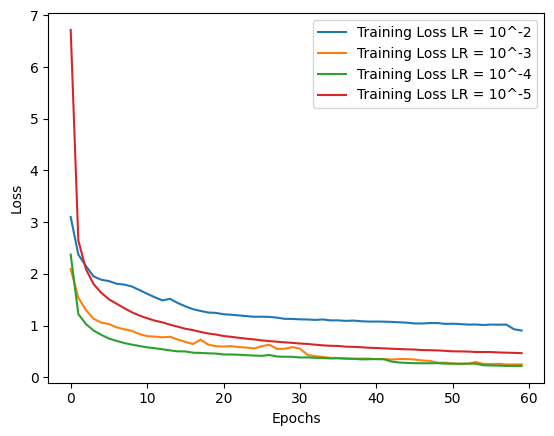

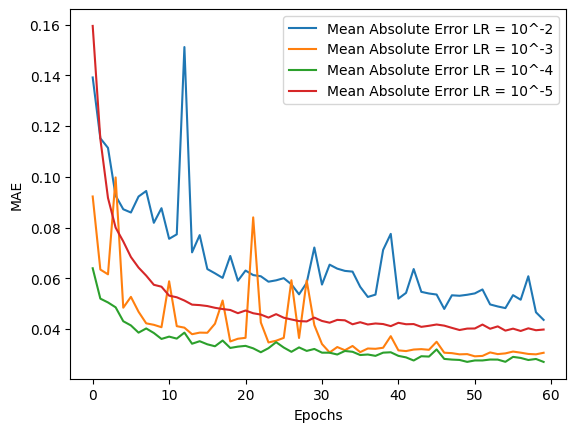

In [11]:
for idx, key in enumerate(t_info.keys()):
    # if idx == 0:
    #     continue
    # Plot loss and root mean square error
    # Plot training loss
    training_info = t_info[key]
    plt.plot(training_info["loss"], label=f"Training Loss {key}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
plt.legend()
plt.show()

for idx, key in enumerate(t_info.keys()):
    # Plot validation accuracy
    # if idx == 0:
    #     continue
    training_info = t_info[key]
    plt.plot(training_info["mae"], label=f"Mean Absolute Error {key}")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
plt.legend()
plt.show()

-----------------------LR = 10^-2-----------------------


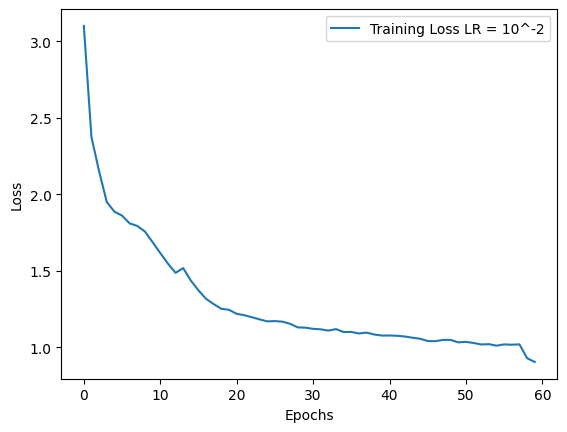

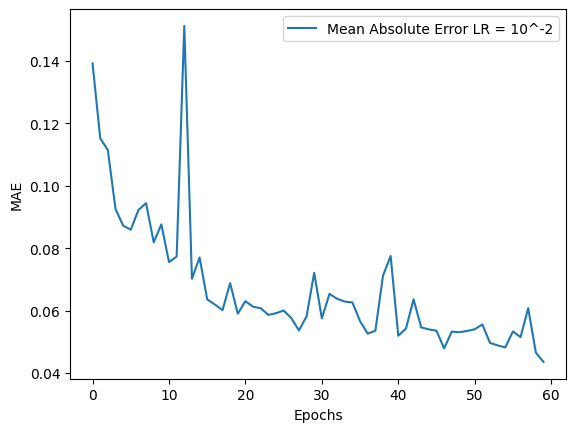

-----------------------LR = 10^-3-----------------------


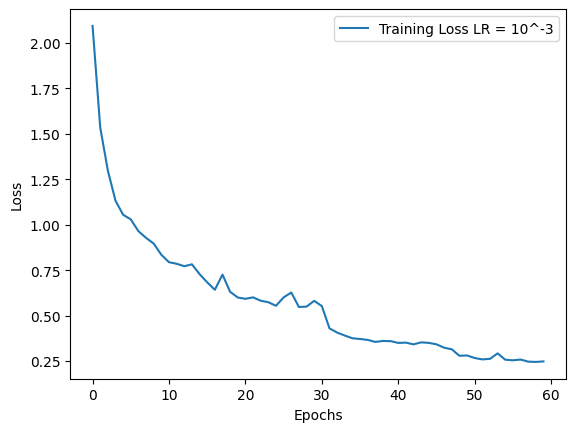

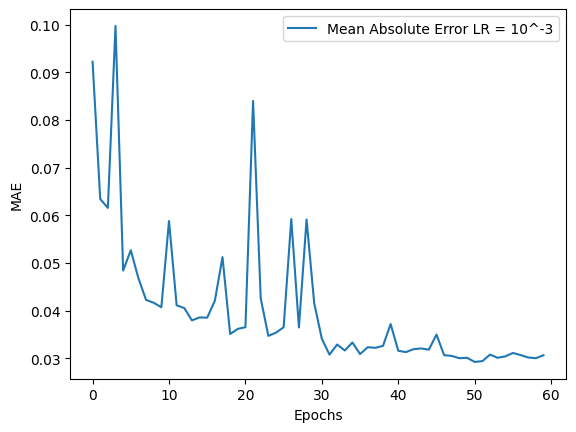

-----------------------LR = 10^-4-----------------------


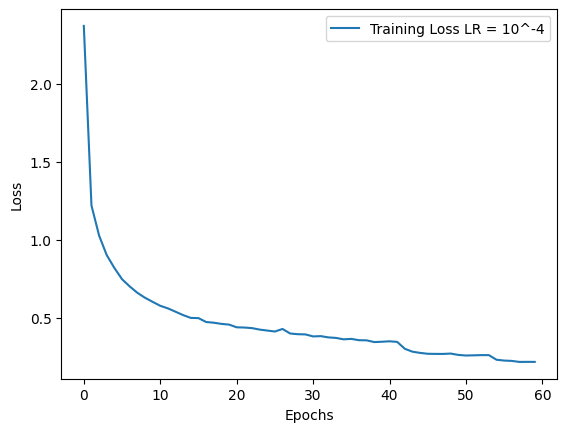

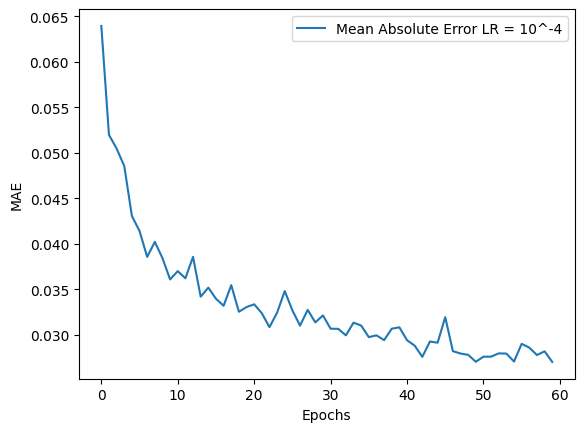

-----------------------LR = 10^-5-----------------------


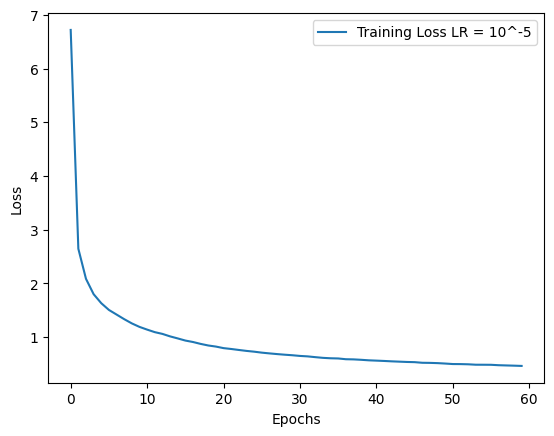

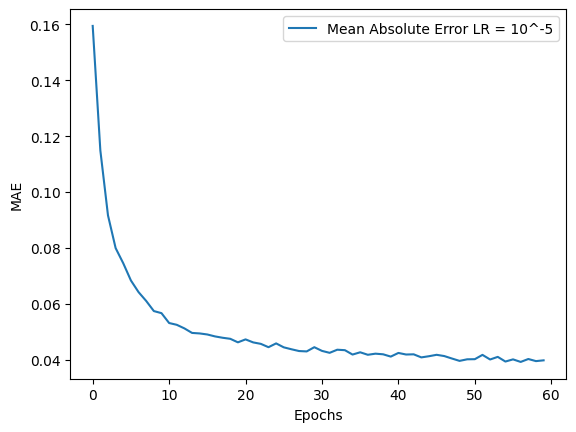

In [12]:
for idx, key in enumerate(t_info.keys()):
    print(f"-----------------------{key}-----------------------")
    training_info = t_info[key]
    plt.plot(training_info["loss"], label=f"Training Loss {key}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    plt.plot(training_info["mae"], label=f"Mean Absolute Error {key}")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.legend()
    plt.show()

# Validation

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:11<00:00,  7.93it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.0241888165473938, 0.054148271679878235, 0.05584227293729782, 0.06758435815572739, 0.04052529111504555, 0.0692816898226738, 0.026418372988700867, 0.04259644076228142, 0.025310112163424492, 0.11084818094968796, 0.10947705060243607, 0.03270101919770241, 0.10654905438423157, 0.03985006734728813, 0.026409106329083443, 0.05833463743329048, 0.053796447813510895, 0.10721170157194138, 0.05327856168150902, 0.044114429503679276, 0.02501726895570755, 0.026850393041968346, 0.0750235766172409, 0.037919655442237854, 0.07707174867391586, 0.08446862548589706, 0.07255026698112488, 0.024907385930418968, 0.024086682125926018, 0.046262890100479126, 0.0253000408411026, 0.0594472773373127, 0.12163619697093964, 0.03472281992435455, 0.033247873187065125, 0.047897130250930786, 0.027881665155291557, 0.028908340260386467, 0.07765631377696991, 0.03058583289384842, 0.03403174877166748, 0.1067475751042366, 0.03767571598291397, 0.09635474532842636, 0.09218376129865646, 0.023593103513121605, 0.028545139357447624, 0

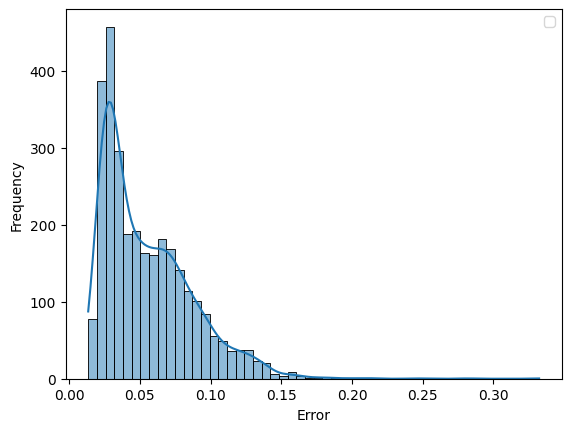

(3000, 21, 3)


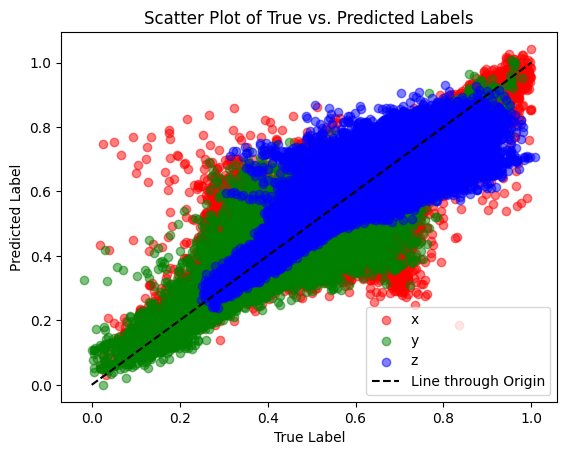

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:09<00:00, 10.15it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.02772681415081024, 0.013141178525984287, 0.011964133940637112, 0.010131589137017727, 0.030265245586633682, 0.011792208068072796, 0.026779893785715103, 0.009366735816001892, 0.050993312150239944, 0.01607678085565567, 0.014773900620639324, 0.13946335017681122, 0.01614750176668167, 0.024298271164298058, 0.05013498291373253, 0.043528590351343155, 0.03273814171552658, 0.026257360354065895, 0.027374722063541412, 0.10304273664951324, 0.01072292122989893, 0.027061061933636665, 0.05673803389072418, 0.04517371207475662, 0.008282420225441456, 0.1451822966337204, 0.13252729177474976, 0.03499628230929375, 0.00945356860756874, 0.06773075461387634, 0.012247985228896141, 0.00919645931571722, 0.00918620452284813, 0.01048249751329422, 0.00674996804445982, 0.020565297454595566, 0.026211287826299667, 0.10843071341514587, 0.00626810546964407, 0.03405202925205231, 0.047470033168792725, 0.005033394321799278, 0.05470499023795128, 0.009028882719576359, 0.0048218825832009315, 0.10457298904657364, 0.010365868

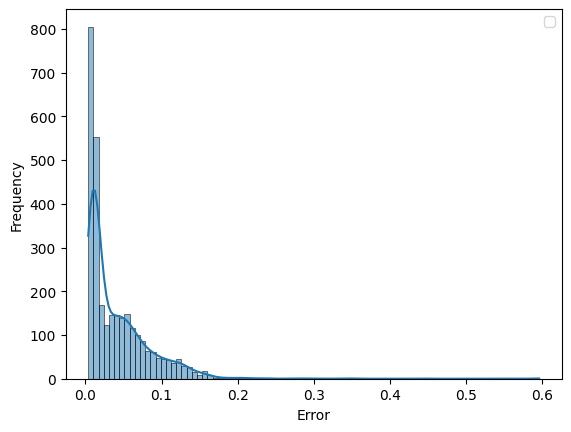

(3000, 21, 3)


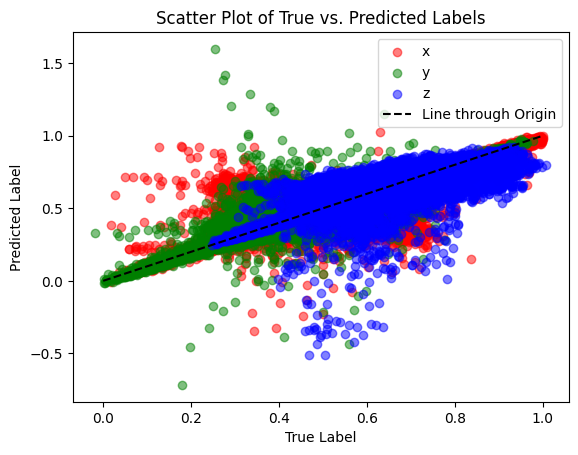

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:09<00:00, 10.04it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.009388820268213749, 0.009626739658415318, 0.008352411910891533, 0.013994196429848671, 0.012448938563466072, 0.010698935016989708, 0.019825709983706474, 0.05277280509471893, 0.008014867082238197, 0.020592184737324715, 0.010449046269059181, 0.037859249860048294, 0.044061049818992615, 0.009819869883358479, 0.011308475397527218, 0.029080066829919815, 0.007481721229851246, 0.021626118570566177, 0.011089692823588848, 0.007003389298915863, 0.032456766813993454, 0.010760338976979256, 0.016203634440898895, 0.09328673779964447, 0.010611504316329956, 0.014345874078571796, 0.014689221046864986, 0.11026642471551895, 0.06274937838315964, 0.1083623468875885, 0.0356941781938076, 0.008980877697467804, 0.04229935258626938, 0.012523910030722618, 0.04065794497728348, 0.03041215054690838, 0.03123597241938114, 0.01679978519678116, 0.025586191564798355, 0.00989354308694601, 0.010034355334937572, 0.010426260530948639, 0.045804258435964584, 0.023987486958503723, 0.05574739724397659, 0.009892113506793976, 0.

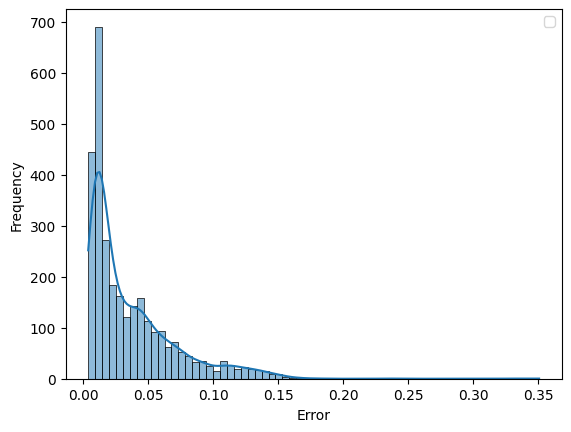

(3000, 21, 3)


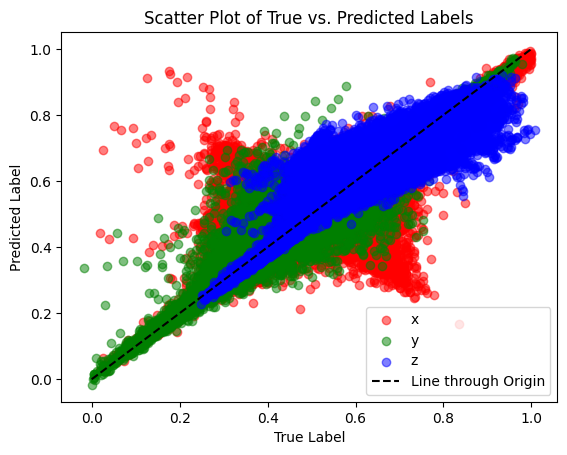

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:09<00:00, 10.37it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.10359412431716919, 0.06623667478561401, 0.023742640390992165, 0.013011034578084946, 0.09805601090192795, 0.028996091336011887, 0.1064000278711319, 0.1086648628115654, 0.014758829958736897, 0.07370145618915558, 0.025971589609980583, 0.012450953014194965, 0.07405104488134384, 0.013118312694132328, 0.06183071434497833, 0.09268039464950562, 0.017857633531093597, 0.01509182807058096, 0.08917612582445145, 0.14293751120567322, 0.04219275712966919, 0.035300616174936295, 0.03442063182592392, 0.016336845234036446, 0.030464118346571922, 0.09701534360647202, 0.06141744181513786, 0.12786650657653809, 0.10268968343734741, 0.12002628296613693, 0.02462116815149784, 0.018148688599467278, 0.018966134637594223, 0.03481319174170494, 0.09467993676662445, 0.09467625617980957, 0.03672029450535774, 0.09408701211214066, 0.05255470797419548, 0.05747976154088974, 0.03471844643354416, 0.018499301746487617, 0.03475795313715935, 0.07785573601722717, 0.01572854071855545, 0.0830683633685112, 0.054456956684589386, 

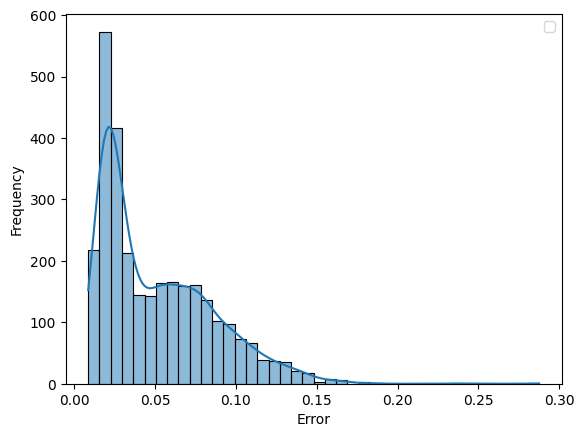

(3000, 21, 3)


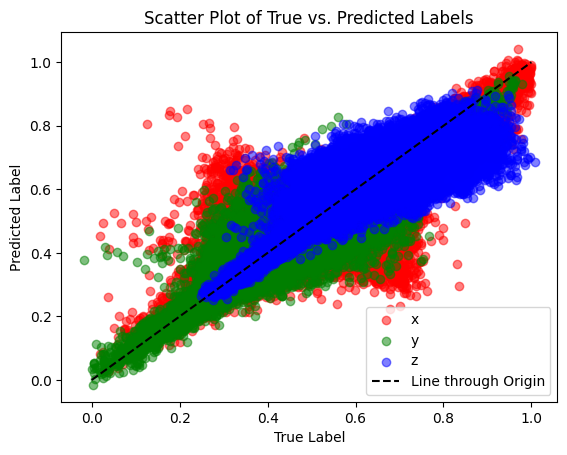

In [13]:
for idx, model in enumerate(saved_models):
    true_labels = []
    predicted_labels = []
    print("--------------------------------------------------------")

    # Set the model to evaluation mode
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    rmse_list = []
    # Loop through the validation dataloader
    with torch.no_grad():
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())
            predicted_labels.extend(outputs.tolist())
            for output, label in zip(outputs, labels.to(device)):
                mse = nn.MSELoss()(output, label)
                rmse = torch.sqrt(mse)
                rmse_list.append(float(rmse))

    print(rmse_list)

    sns.histplot(rmse_list, kde=True)
    # plt.hist(rmse_list, kde=True)
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    import numpy as np

    print(np.array(true_labels).shape)
    true_array = np.array(true_labels)
    pred_array = np.array(predicted_labels)
    plt.scatter(true_array[:, :, 0], pred_array[:, :, 0], alpha=0.5, c="r", label="x")
    plt.scatter(true_array[:, :, 1], pred_array[:, :, 1], alpha=0.5, c="g", label="y")
    plt.scatter(true_array[:, :, 2], pred_array[:, :, 2], alpha=0.5, c="b", label="z")
    line_x = np.linspace(0, 1, 100)
    line_y = line_x  # y = x for the line going through the origin

    plt.plot(line_x, line_y, color="black", linestyle="--", label="Line through Origin")
    plt.legend()
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title("Scatter Plot of True vs. Predicted Labels")
    plt.show()

In [14]:
# from PIL import Image
# from os import listdir
# import torch.nn.functional as F

# image_head = "../images/"
# paths = listdir(image_head)

# transform = transforms.Compose({
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# })

# for path in paths:
#     image = Image.open(image_head+path)
#     image = transform(image) / 255
#     output = model(torch.stack([image]).to(device))
#     print(torch.argmax(output),F.softmax(output, dim=1).tolist())

In [15]:
old_model = model

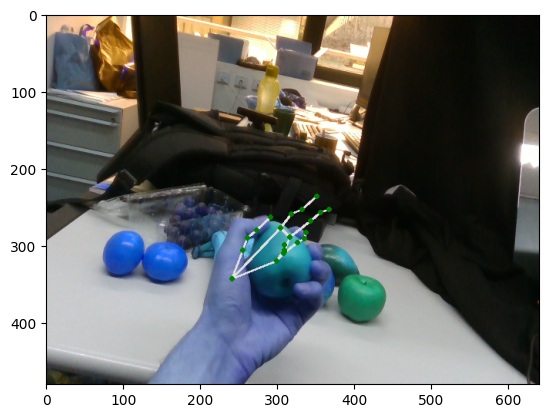

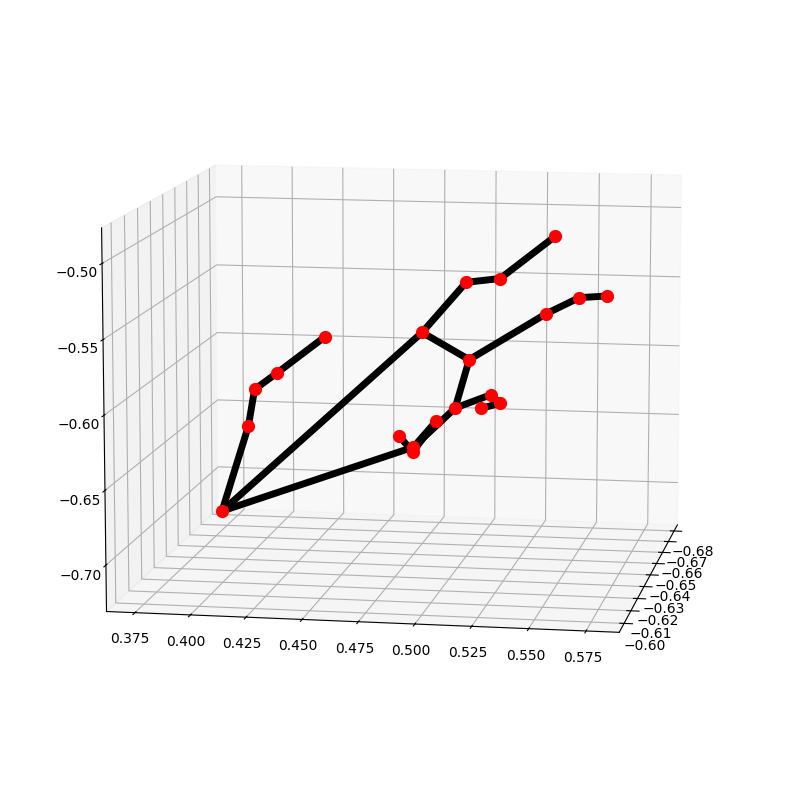

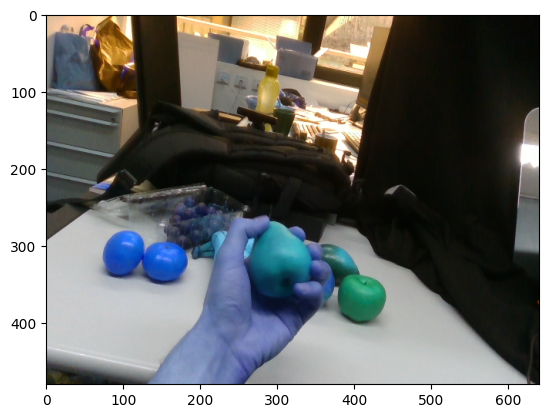

In [24]:
import cv2
from PIL import Image
import mediapipe as mp
import mediapipe.framework.formats.landmark_pb2 as landmark_pb2
from google.protobuf import text_format
import points_displayer
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import models
from importlib import reload

# reload(models)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# file = "/home/devcontainers/third-year-project/data/freihand/left/training/rgb/00000099.jpg"
file = "/home/devcontainers/third-year-project/data/EgoDexter/data/Fruits/color/image_00100_color.png"
# file = "/home/devcontainers/third-year-project/data/HO3D_Cropped/left/00003.jpg"
import random
# file = val_subset.dataset.paths[random.choice(val_subset.indices)]

image = Image.open(file)
model = saved_models[2]
# model = models.OccModel().to(device)

# model.load_state_dict(torch.load("models/points_20240103-024547.pt"))
# model.load_state_dict(torch.load("models/points_20240104-022118.pt"))
# model = old_model
model.eval()
transform = transforms.Compose(
    {
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    }
)

# image.resize(224,224)

image = transform(image) / 255

joints = model(torch.stack([image]).to(device))

# print(joints[0])


mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
# mp_drawing_styles = mp.solutions.drawing_styles

landmarks = ""
for X, Y, Z in joints[0]:
    formatted_string = f"landmark {{x: {X} y: {Y} z: {Z}}} "
    landmarks = landmarks + formatted_string

hand_landmarks = text_format.Parse(landmarks, landmark_pb2.NormalizedLandmarkList())

# img = cv2.imread(file)
img2 = cv2.imread(file)
# img2.show()
# img2 = np.array(image * 255)
# img2 = cv2.resize(img2, (224,224))
# mp_drawing.draw_landmarks(
#             img,
#             hand_landmarks,
#             mp_hands.HAND_CONNECTIONS,
#             mp_drawing_styles.get_default_hand_landmarks_style(),
#             mp_drawing_styles.get_default_hand_connections_style())
points_displayer.draw_landmarks(img2, joints.cpu().detach().numpy().tolist()[0])
# plt.imshow(img)
# plt.show()
plt.imshow(img2)
plt.show()

mp_drawing.plot_landmarks(hand_landmarks, mp_hands.HAND_CONNECTIONS)
plt.imshow(cv2.imread(file))

Save Validation Set for Testing

In [17]:
with open("val_paths.txt", "w") as f:
    for idx in tqdm(val_subset.indices, total=len(val_subset.indices)):
        f.write(f"{val_subset.dataset.paths[idx]}\n")
    

100%|██████████| 3000/3000 [00:00<00:00, 715181.99it/s]
